## Funções fixas

In [1]:
import math

def haversine(lat1, lon1, lat2, lon2):
    # Raio da Terra em km
    R = 6371.0
    
    # Converter de graus para radianos
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    
    # Diferença de coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Fórmula de Haversine
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    
    # Distância
    distance = R * c
    return distance


In [2]:
def dms_para_dd(graus, minutos, segundos, direcao):
    # Converter para graus decimais
    decimal = graus + (minutos / 60) + (segundos / 3600)
    
    # Ajustar o sinal para Sul e Oeste
    if direcao in ['S', 'W']:
        decimal = -decimal
    
    return decimal


In [3]:
import re

def converter_coordenada(coordenada):
    # Expressão regular para extrair os valores de graus, minutos, segundos e direção
    match = re.match(r"(\d+)° (\d+)' (\d+)'' (\w)", coordenada)
    
    if match:
        graus = int(match.group(1))
        minutos = int(match.group(2))
        segundos = int(match.group(3))
        direcao = match.group(4)

        # Chamar a função de conversão
        return dms_para_dd(graus, minutos, segundos, direcao)
    else:
        return None  # Caso a string não corresponda ao formato esperado

In [4]:
import random

def gerar_assentos_ocupados(assentos_totais):
    percentual_ocupacao = random.uniform(0.5, 0.95)  # Escolhe um percentual entre 50% e 95%
    return int(assentos_totais * percentual_ocupacao)

## Importação das bases

In [5]:
import pandas as pd

df_aeroportos = pd.read_excel('bases/aeroportos.xls', date_format='utf-8', skiprows=2)


In [6]:
df_empresas = pd.read_excel('bases/empresas_aereas.xls', date_format='utf-8', skiprows=3)

df_empresas = df_empresas.drop(columns=["Unnamed: 0", "Unnamed: 3"])


In [7]:
df_voos = pd.read_csv('bases/VRA_20240916110513.csv', sep=";")


/tmp/ipykernel_8456/3110746896.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_voos = pd.read_csv('bases/VRA_20240916110513.csv', sep=";")


In [8]:
df_reclamacoes2022 = pd.read_csv('bases/reclamacoes/dadosconsumidor2022.csv', sep=";", skiprows=1)

df_reclamacoes2023 = pd.read_csv('bases/reclamacoes/dadosconsumidor2023.csv', sep=";", skiprows=1)

In [9]:
df_reclamacoes = pd.concat([df_reclamacoes2022,df_reclamacoes2023], ignore_index=True)


## Exploração das tabelas e visualização das colunas

In [10]:
print(df_aeroportos.dtypes)


CÓDIGO OACI                                                                                         object
CIAD                                                                                                object
NOME                                                                                                object
MUNICÍPIO ATENDIDO                                                                                  object
UF                                                                                                  object
LATITUDE                                                                                            object
LONGITUDE                                                                                           object
ALTITUDE                                                                                            object
OPERAÇÃO                                                                                            object
DESIGNAÇÃO                           

In [11]:
print(df_empresas.dtypes)

Sigla OACI                 object
Nome Empresas              object
Nacional ou Estrangeira    object
dtype: object


In [12]:
print(df_reclamacoes.dtypes)

Gestor                             object
Região                             object
UF                                 object
Cidade                             object
Ano Abertura                        int64
Mês Abertura                        int64
Data Abertura                      object
Data e Hora Resposta               object
Data e Hora Análise                object
Data e Hora Recusa                 object
Data Finalização                   object
Prazo Resposta                     object
Prazo Análise Gestor (em dias)    float64
Tempo Resposta (em dias)          float64
Nome Fantasia                      object
Área                               object
Assunto                            object
Grupo Problema                     object
Problema                           object
Forma Contrato                     object
Procurou Empresa                   object
Respondida                         object
Situação                           object
Avaliação Reclamação              

In [13]:
print(df_voos.dtypes)

Sigla ICAO Empresa Aérea         object
Empresa Aérea                    object
Número Voo                       object
Código DI                        object
Código Tipo Linha                object
Modelo Equipamento               object
Número de Assentos                int64
Sigla ICAO Aeroporto Origem      object
Descrição Aeroporto Origem       object
Partida Prevista                 object
Partida Real                     object
Sigla ICAO Aeroporto Destino     object
Descrição Aeroporto Destino      object
Chegada Prevista                 object
Chegada Real                     object
Situação Voo                     object
Justificativa                   float64
Referência                       object
Situação Partida                 object
Situação Chegada                 object
dtype: object


In [14]:
df_voos.head(5)

,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Código DI,Código Tipo Linha,Modelo Equipamento,Número de Assentos,Sigla ICAO Aeroporto Origem,Descrição Aeroporto Origem,Partida Prevista,Partida Real,Sigla ICAO Aeroporto Destino,Descrição Aeroporto Destino,Chegada Prevista,Chegada Real,Situação Voo,Justificativa,Referência,Situação Partida,Situação Chegada
0,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,7,I,E145,50,SKLT,ALFREDO VÁSQUEZ COBO INTERNATIONAL AIRPORT - L...,27/08/2023 18:10,27/08/2023 19:00,SLVR,VIRU VIRU INTERNATIONAL AIRPORT - SANTA CRUZ -...,27/08/2023 21:00,27/08/2023 21:50,REALIZADO,NaN,27/08/2023 00:00:00,Atraso 30-60,Atraso 30-60
1,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,7,X,E145,50,SBCY,MARECHAL RONDON - VÁRZEA GRANDE - MT - BRASIL,NaN,31/08/2023 07:07,SBEG,EDUARDO GOMES - MANAUS - AM - BRASIL,NaN,31/08/2023 09:19,REALIZADO,NaN,27/08/2023 00:00:00,NaN,NaN
2,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,7,X,E145,50,SBEG,EDUARDO GOMES - MANAUS - AM - BRASIL,NaN,31/08/2023 10:50,SKPE,MATECAÑA INTERNATIONAL AIRPORT - PEREIRA - COL...,NaN,31/08/2023 13:36,REALIZADO,NaN,27/08/2023 00:00:00,NaN,NaN
3,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,7,X,E145,50,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,NaN,31/08/2023 02:15,SBCY,MARECHAL RONDON - VÁRZEA GRANDE - MT - BRASIL,NaN,31/08/2023 04:55,REALIZADO,NaN,27/08/2023 00:00:00,NaN,NaN
4,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,7,I,E145,50,SLVR,VIRU VIRU INTERNATIONAL AIRPORT - SANTA CRUZ -...,27/08/2023 22:00,27/08/2023 22:54,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,28/08/2023 00:55,28/08/2023 01:23,REALIZADO,NaN,27/08/2023 00:00:00,Atraso 30-60,Pontual


### Selecionando apenas as colunas necessárias

In [15]:
df_voos_selected = df_voos[['Sigla ICAO Empresa Aérea', 'Empresa Aérea', 'Número Voo',
                            'Número de Assentos', 'Sigla ICAO Aeroporto Origem',
                            'Partida Prevista', 'Partida Real', 'Sigla ICAO Aeroporto Destino',
                            'Chegada Prevista','Chegada Real', 'Situação Voo', 'Situação Partida', 'Situação Chegada']]

In [16]:
df_aeroportos_selected =  df_aeroportos[['CÓDIGO OACI', 'CIAD', 'NOME', 'LATITUDE', 'LONGITUDE', 'MUNICÍPIO ATENDIDO', 'UF',]]

### Filtrando voos domésticos

In [17]:
# Realizando o merge para aeroportos de origem
df_voos_brasil_origem = pd.merge(df_voos_selected, df_aeroportos_selected,
                                 left_on='Sigla ICAO Aeroporto Origem', right_on='CÓDIGO OACI',
                                 how='inner')

# Realizando o merge para aeroportos de destino
df_voos_brasil_destino = pd.merge(df_voos_brasil_origem, df_aeroportos_selected,
                                  left_on='Sigla ICAO Aeroporto Destino', right_on='CÓDIGO OACI',
                                  how='inner',
                                  suffixes=('_origem', '_destino'))

# Selecionando apenas os voos domésticos (com origem e destino no Brasil)
df_voos_domesticos = df_voos_brasil_destino[['Sigla ICAO Empresa Aérea', 'Empresa Aérea', 'Número Voo',
                                             'Número de Assentos', 'Sigla ICAO Aeroporto Origem',
                                             'Partida Prevista', 'Partida Real', 'Sigla ICAO Aeroporto Destino',
                                             'Chegada Prevista', 'Chegada Real', 'Situação Voo', 'Situação Partida', 'Situação Chegada', 'NOME_origem', 
                                             'NOME_destino', 'LATITUDE_origem', 'LONGITUDE_origem',
                                             'LATITUDE_destino', 'LONGITUDE_destino']]

# Mostrando o resultado
df_voos_domesticos.head(5)

,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Número de Assentos,Sigla ICAO Aeroporto Origem,Partida Prevista,Partida Real,Sigla ICAO Aeroporto Destino,Chegada Prevista,Chegada Real,Situação Voo,Situação Partida,Situação Chegada,NOME_origem,NOME_destino,LATITUDE_origem,LONGITUDE_origem,LATITUDE_destino,LONGITUDE_destino
0,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBCY,NaN,31/08/2023 07:07,SBEG,NaN,31/08/2023 09:19,REALIZADO,NaN,NaN,MARECHAL RONDON,EDUARDO GOMES,15° 39' 0'' S,56° 7' 3'' W,3° 2' 28'' S,60° 3' 2'' W
1,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBGR,NaN,31/08/2023 02:15,SBCY,NaN,31/08/2023 04:55,REALIZADO,NaN,NaN,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,MARECHAL RONDON,23° 26' 8'' S,46° 28' 23'' W,15° 39' 0'' S,56° 7' 3'' W
2,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBGR,31/08/2023 02:15,NaN,SBCY,31/08/2023 04:40,NaN,CANCELADO,NaN,NaN,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,MARECHAL RONDON,23° 26' 8'' S,46° 28' 23'' W,15° 39' 0'' S,56° 7' 3'' W
3,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBCY,31/08/2023 05:40,NaN,SBEG,31/08/2023 08:15,NaN,CANCELADO,NaN,NaN,MARECHAL RONDON,EDUARDO GOMES,15° 39' 0'' S,56° 7' 3'' W,3° 2' 28'' S,60° 3' 2'' W
4,AAL,"AMERICAN AIRLINES, INC.",0963,285,SBGL,NaN,21/06/2023 09:05,SBGR,NaN,21/06/2023 10:26,REALIZADO,NaN,NaN,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,22° 48' 36'' S,43° 15' 2'' W,23° 26' 8'' S,46° 28' 23'' W


### Tratando as colunas de latitude e longitude

In [18]:
df_voos_domesticos = df_voos_domesticos.assign(
    LATITUDE_origem_decimal=df_voos_domesticos['LATITUDE_origem'].apply(converter_coordenada),
    LATITUDE_destino_decimal=df_voos_domesticos['LATITUDE_destino'].apply(converter_coordenada),
    LONGITUDE_origem_decimal=df_voos_domesticos['LONGITUDE_origem'].apply(converter_coordenada),
    LONGITUDE_destino_decimal=df_voos_domesticos['LONGITUDE_destino'].apply(converter_coordenada)
)

df_voos_domesticos = df_voos_domesticos.drop(['LATITUDE_origem', 'LATITUDE_destino', 'LONGITUDE_origem', 'LONGITUDE_destino'], axis=1)

In [19]:
df_voos_domesticos = df_voos_domesticos.rename(columns={'LATITUDE_origem_decimal': 'lat_origem',
                        'LONGITUDE_origem_decimal': 'lon_origem',
                        'LATITUDE_destino_decimal': 'lat_destino',
                        'LONGITUDE_destino_decimal': 'lon_destino'})

## Adição de métricas e henriquecimento da base

### Calculando a distância entre os aeroportos de origem e destino

In [20]:
df_voos_domesticos['distancia'] = df_voos_domesticos.apply(lambda row: haversine(row['lat_origem'], row['lon_origem'], row['lat_destino'], row['lon_destino']), axis=1)

df_voos_domesticos.head(5)

,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Número de Assentos,Sigla ICAO Aeroporto Origem,Partida Prevista,Partida Real,Sigla ICAO Aeroporto Destino,Chegada Prevista,Chegada Real,Situação Voo,Situação Partida,Situação Chegada,NOME_origem,NOME_destino,lat_origem,lat_destino,lon_origem,lon_destino,distancia
0,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBCY,NaN,31/08/2023 07:07,SBEG,NaN,31/08/2023 09:19,REALIZADO,NaN,NaN,MARECHAL RONDON,EDUARDO GOMES,-15.650000,-3.041111,-56.117500,-60.050556,1466.673883
1,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBGR,NaN,31/08/2023 02:15,SBCY,NaN,31/08/2023 04:55,REALIZADO,NaN,NaN,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,MARECHAL RONDON,-23.435556,-15.650000,-46.473056,-56.117500,1329.813082
2,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBGR,31/08/2023 02:15,NaN,SBCY,31/08/2023 04:40,NaN,CANCELADO,NaN,NaN,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,MARECHAL RONDON,-23.435556,-15.650000,-46.473056,-56.117500,1329.813082
3,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBCY,31/08/2023 05:40,NaN,SBEG,31/08/2023 08:15,NaN,CANCELADO,NaN,NaN,MARECHAL RONDON,EDUARDO GOMES,-15.650000,-3.041111,-56.117500,-60.050556,1466.673883
4,AAL,"AMERICAN AIRLINES, INC.",0963,285,SBGL,NaN,21/06/2023 09:05,SBGR,NaN,21/06/2023 10:26,REALIZADO,NaN,NaN,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,-22.810000,-23.435556,-43.250556,-46.473056,336.791839


### Adicionando coluna do numero de assentos ocupados gerados de forma randomica

In [21]:
df_voos_domesticos['assentos_ocupados'] = df_voos_domesticos.apply(lambda row: gerar_assentos_ocupados \
                                                                    (row['Número de Assentos']), axis=1) 

## Separando tabelas conforme modelagem

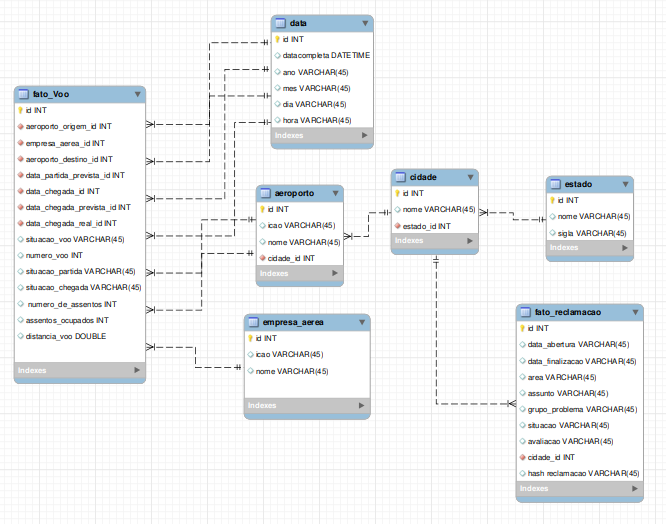

### Tabela estado

In [22]:

data = {
    'Estado': ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 
               'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba', 
               'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 
               'Rondônia', 'Roraima', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
    'Sigla': ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 
              'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
}

tb_estado = pd.DataFrame(data)
tb_estado['ID'] = tb_estado.index + 1
tb_estado = tb_estado[['ID', 'Sigla', 'Estado']]

tb_estado.head()


,ID,Sigla,Estado
0,1,AC,Acre
1,2,AL,Alagoas
2,3,AP,Amapá
3,4,AM,Amazonas
4,5,BA,Bahia


### Tabela cidade


In [23]:
tb_cidade = df_aeroportos[['MUNICÍPIO ATENDIDO', 'UF']]
tb_cidade = tb_cidade.merge(tb_estado, left_on='UF', right_on='Sigla')
tb_cidade = tb_cidade.rename(columns={'ID':'uf_id'})
tb_cidade = tb_cidade.drop(columns={'Estado','Sigla'})
tb_cidade['ID'] = tb_cidade.index + 1
tb_cidade = tb_cidade[['ID', 'MUNICÍPIO ATENDIDO', 'UF', 'uf_id']]

tb_cidade = tb_cidade.drop_duplicates()

tb_cidade

,ID,MUNICÍPIO ATENDIDO,UF,uf_id
0,1,CONCEIÇÃO DO ARAGUAIA,PA,14
1,2,BAURU E AREALVA,SP,25
2,3,ARARAQUARA,SP,25
3,4,ARACAJU,SE,26
4,5,ALTA FLORESTA,MT,11
...,...,...,...,...
528,529,NOVA XAVANTINA,MT,11
529,530,APUÍ,AM,4
530,531,SÃO ROQUE,SP,25
531,532,SANTA RITA DO SAPUCAÍ,MG,13


### Tabela aeroporto

In [24]:
#tabela aeroporto

tb_aeroporto = df_aeroportos_selected[['CÓDIGO OACI', 'MUNICÍPIO ATENDIDO']]
tb_aeroporto = tb_aeroporto.merge(tb_cidade, on='MUNICÍPIO ATENDIDO')
tb_aeroporto = tb_aeroporto.rename(columns={'ID':'cidade_id'})
tb_aeroporto = tb_aeroporto.drop(columns={'UF', 'uf_id'})
tb_aeroporto['ID'] = tb_aeroporto.index + 1
tb_aeroporto = tb_aeroporto[['ID', 'CÓDIGO OACI', 'MUNICÍPIO ATENDIDO', 'cidade_id']]

tb_aeroporto = tb_aeroporto.drop_duplicates(subset=['CÓDIGO OACI' , 'MUNICÍPIO ATENDIDO'])

tb_aeroporto


,ID,CÓDIGO OACI,MUNICÍPIO ATENDIDO,cidade_id
0,1,SBAA,CONCEIÇÃO DO ARAGUAIA,1
1,2,SBAE,BAURU E AREALVA,2
2,3,SBAQ,ARARAQUARA,3
3,4,SBAR,ARACAJU,4
4,5,SBAT,ALTA FLORESTA,5
...,...,...,...,...
566,567,SWXV,NOVA XAVANTINA,529
567,568,SWYN,APUÍ,530
568,569,SBJH,SÃO ROQUE,531
569,570,SJXI,SANTA RITA DO SAPUCAÍ,532


### Tabela empresa aérea


In [25]:
tb_empresa_aerea = df_empresas[['Sigla OACI', 'Nome Empresas']]
tb_empresa_aerea['ID'] = tb_empresa_aerea.index + 1
tb_empresa_aerea = tb_empresa_aerea[['ID', 'Sigla OACI', 'Nome Empresas']]

tb_empresa_aerea


,ID,Sigla OACI,Nome Empresas
0,1,AAL,AMERICAN AIRLINES INC
1,2,ABD,AIR ATLANTA ICELANDIC
2,3,ABJ,ABAETE
3,4,ABZ,ATA BRASIL
4,5,ACA,AIR CANADA
...,...,...,...
168,169,VRG,VRG LINHAS AREAS
169,170,VRN,VRG LINHAS AEREAS
170,171,VSO,NÃO INFORMADO
171,172,VSP,VASP


### Tabela data

In [26]:
partida_prevista = pd.to_datetime(df_voos_domesticos['Partida Prevista'])
partida_real = pd.to_datetime(df_voos_domesticos['Partida Real'])
chegada_prevista = pd.to_datetime(df_voos_domesticos['Chegada Prevista'])
chegada_real = pd.to_datetime(df_voos_domesticos['Chegada Real'])

datas_completas = pd.concat([partida_prevista, partida_real, chegada_prevista, chegada_real])
datas_completas = datas_completas.to_frame(name='dataCompleta')

tb_data = datas_completas.drop_duplicates().dropna().reset_index(drop=True)

tb_data['ano'] = tb_data['dataCompleta'].dt.year
tb_data['mes'] = tb_data['dataCompleta'].dt.month
tb_data['dia'] = tb_data['dataCompleta'].dt.day
tb_data['hora'] = tb_data['dataCompleta'].dt.time

tb_data['Id'] = tb_data.index + 1

tb_data = tb_data[['Id', 'dataCompleta', 'ano', 'mes', 'dia', 'hora']]

tb_data.head()


/tmp/ipykernel_8456/2220885468.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  partida_prevista = pd.to_datetime(df_voos_domesticos['Partida Prevista'])
/tmp/ipykernel_8456/2220885468.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  partida_real = pd.to_datetime(df_voos_domesticos['Partida Real'])
/tmp/ipykernel_8456/2220885468.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chegada_prevista = pd.to_datetime(df_voos_domesticos['Chegada Prevista'])
/tmp/ipykernel_8456/2220885468.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specif

,Id,dataCompleta,ano,mes,dia,hora
0,1,2023-08-31 02:15:00,2023,8,31,02:15:00
1,2,2023-08-31 05:40:00,2023,8,31,05:40:00
2,3,2023-11-30 17:55:00,2023,11,30,17:55:00
3,4,2023-11-30 10:10:00,2023,11,30,10:10:00
4,5,2023-12-01 14:40:00,2023,12,1,14:40:00


### Tabela fato voo

#### Join empresa aerea

In [27]:
df_result = tb_empresa_aerea.merge(df_voos_domesticos, left_on='Sigla OACI', right_on='Sigla ICAO Empresa Aérea')

df_join_empresa_aerea = df_result.rename(columns={'ID':'empresa_aerea_id'})

df_join_empresa_aerea


,empresa_aerea_id,Sigla OACI,Nome Empresas,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Número de Assentos,Sigla ICAO Aeroporto Origem,Partida Prevista,Partida Real,...,Situação Partida,Situação Chegada,NOME_origem,NOME_destino,lat_origem,lat_destino,lon_origem,lon_destino,distancia,assentos_ocupados
0,1,AAL,AMERICAN AIRLINES INC,AAL,"AMERICAN AIRLINES, INC.",0963,285,SBGL,NaN,21/06/2023 09:05,...,NaN,NaN,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,-22.810000,-23.435556,-43.250556,-46.473056,336.791839,235
1,1,AAL,AMERICAN AIRLINES INC,AAL,"AMERICAN AIRLINES, INC.",0905,234,SBCF,NaN,02/08/2023 09:55,...,NaN,NaN,TANCREDO NEVES,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,-19.624444,-22.810000,-43.971944,-43.250556,362.021660,216
2,1,AAL,AMERICAN AIRLINES INC,AAL,"AMERICAN AIRLINES, INC.",0995,234,SBGL,NaN,24/08/2023 09:23,...,NaN,NaN,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,-22.810000,-23.435556,-43.250556,-46.473056,336.791839,135
3,1,AAL,AMERICAN AIRLINES INC,AAL,"AMERICAN AIRLINES, INC.",0948,272,SBGL,NaN,28/12/2023 22:07,...,NaN,NaN,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,EDUARDO GOMES,-22.810000,-3.041111,-43.250556,-60.050556,2847.404725,221
4,1,AAL,AMERICAN AIRLINES INC,AAL,"AMERICAN AIRLINES, INC.",9603,0,SBBR,NaN,28/04/2024 09:58,...,NaN,NaN,PRESIDENTE JUSCELINO KUBITSCHEK,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,-15.871111,-23.435556,-47.918611,-46.473056,854.613441,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243674,156,TTL,TOTAL,TTL,TOTAL LINHAS AÉREAS S.A.,5683,0,SBGR,31/07/2024 02:20,31/07/2024 02:10,...,Antecipado,Antecipado,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,-23.435556,-22.810000,-46.473056,-43.250556,336.791839,0
1243675,156,TTL,TOTAL,TTL,TOTAL LINHAS AÉREAS S.A.,5683,0,SBGL,31/07/2024 04:20,31/07/2024 04:12,...,Antecipado,Antecipado,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,EURICO DE AGUIAR SALLES,-22.810000,-20.258056,-43.250556,-40.286389,417.727084,0
1243676,162,UAE,EMIRATES,UAE,EMIRATES,0261,516,SBGL,NaN,27/09/2023 19:15,...,NaN,NaN,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,-22.810000,-23.435556,-43.250556,-46.473056,336.791839,271
1243677,162,UAE,EMIRATES,UAE,EMIRATES,0261,0,SBGL,NaN,29/11/2023 01:36,...,NaN,NaN,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,-22.810000,-23.435556,-43.250556,-46.473056,336.791839,0


#### Join aeroporto

In [28]:
# aeroporto origem
df_result = df_join_empresa_aerea.merge(tb_aeroporto, left_on='Sigla ICAO Aeroporto Origem', right_on='CÓDIGO OACI')

df_join_aeroporto_origem = df_result.rename(columns={'ID':'aeroporto_origem_id'})

# aeroporto destino
df_result = df_join_aeroporto_origem.merge(tb_aeroporto, left_on='Sigla ICAO Aeroporto Destino', right_on='CÓDIGO OACI')

df_join_aeroporto_origem_destino = df_result.rename(columns={'ID':'aeroporto_destino_id'})

#### Join data

In [29]:
df_join_aeroporto_origem_destino['Partida Prevista'] = pd.to_datetime(df_join_aeroporto_origem_destino['Partida Prevista'], format='%d/%m/%Y %H:%M')
df_join_aeroporto_origem_destino['Partida Real'] = pd.to_datetime(df_join_aeroporto_origem_destino['Partida Real'], format='%d/%m/%Y %H:%M')
df_join_aeroporto_origem_destino['Chegada Prevista'] = pd.to_datetime(df_join_aeroporto_origem_destino['Chegada Prevista'], format='%d/%m/%Y %H:%M')
df_join_aeroporto_origem_destino['Chegada Real'] = pd.to_datetime(df_join_aeroporto_origem_destino['Chegada Real'], format='%d/%m/%Y %H:%M')


# partida prevista
df_result = df_join_aeroporto_origem_destino.merge(tb_data, left_on='Partida Prevista', right_on='dataCompleta', suffixes=('', '_partida_real'))

df_join_partida_prevista = df_result.rename(columns={'Id':'data_partida_prevista_id'})


#partida real
df_result = df_join_partida_prevista.merge(tb_data, left_on='Partida Real', right_on='dataCompleta', suffixes=('', '_partida_real'))

df_join_partida_prevista_real = df_result.rename(columns={'Id':'data_partida_real_id'})


#chegada prevista
df_result = df_join_partida_prevista_real.merge(tb_data, left_on='Chegada Prevista', right_on='dataCompleta', suffixes=('', '_chegada_prevista'))

df_partida_completa_chegada_prevista = df_result.rename(columns={'Id':'data_chegada_prevista_id'})

#chegada real
df_result = df_partida_completa_chegada_prevista.merge(tb_data, left_on='Chegada Real', right_on='dataCompleta', suffixes=('', '_chegada_real'))

df_datas_partida_chegada = df_result.rename(columns={'Id':'data_chegada_real_id'})


In [30]:
df_datas_partida_chegada.columns

Index(['empresa_aerea_id', 'Sigla OACI', 'Nome Empresas',
       'Sigla ICAO Empresa Aérea', 'Empresa Aérea', 'Número Voo',
       'Número de Assentos', 'Sigla ICAO Aeroporto Origem', 'Partida Prevista',
       'Partida Real', 'Sigla ICAO Aeroporto Destino', 'Chegada Prevista',
       'Chegada Real', 'Situação Voo', 'Situação Partida', 'Situação Chegada',
       'NOME_origem', 'NOME_destino', 'lat_origem', 'lat_destino',
       'lon_origem', 'lon_destino', 'distancia', 'assentos_ocupados',
       'aeroporto_origem_id', 'CÓDIGO OACI_x', 'MUNICÍPIO ATENDIDO_x',
       'cidade_id_x', 'aeroporto_destino_id', 'CÓDIGO OACI_y',
       'MUNICÍPIO ATENDIDO_y', 'cidade_id_y', 'data_partida_prevista_id',
       'dataCompleta', 'ano', 'mes', 'dia', 'hora', 'data_partida_real_id',
       'dataCompleta_partida_real', 'ano_partida_real', 'mes_partida_real',
       'dia_partida_real', 'hora_partida_real', 'data_chegada_prevista_id',
       'dataCompleta_chegada_prevista', 'ano_chegada_prevista',
     

In [35]:
tb_fato_voo = df_datas_partida_chegada[['empresa_aerea_id', 'aeroporto_origem_id', 'aeroporto_destino_id', 'data_partida_prevista_id', 'data_partida_real_id', 'data_chegada_prevista_id', 'data_chegada_real_id', \
    'Situação Voo', 'Número Voo', 'Situação Partida', 'Situação Chegada', 'Número de Assentos', 'assentos_ocupados', 'distancia']]

tb_fato_voo.drop_duplicates()


,empresa_aerea_id,aeroporto_origem_id,aeroporto_destino_id,data_partida_prevista_id,data_partida_real_id,data_chegada_prevista_id,data_chegada_real_id,Situação Voo,Número Voo,Situação Partida,Situação Chegada,Número de Assentos,assentos_ocupados,distancia
0,22,79,43,29682,29682,29852,549093,REALIZADO,2002,Pontual,Antecipado,0,0,2619.782179
1,22,43,79,29683,29847,29802,29758,REALIZADO,2003,Antecipado,Antecipado,0,0,2619.782179
2,22,43,79,29684,174696,155263,638318,REALIZADO,2009,Antecipado,Antecipado,0,0,2619.782179
3,22,133,46,29687,174697,29825,638319,REALIZADO,2332,Antecipado,Antecipado,174,90,2202.737547
4,22,46,133,29688,174698,29727,29696,REALIZADO,2333,Antecipado,Antecipado,174,102,2202.737547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175001,156,56,34,159439,630287,159279,141547,REALIZADO,5681,Antecipado,Antecipado,0,0,359.350217
1175002,156,34,47,141459,630288,141631,705005,REALIZADO,5681,Antecipado,Antecipado,0,0,245.751130
1175003,156,150,56,141615,430331,633879,704968,REALIZADO,5682,Pontual,Pontual,0,0,729.612933
1175004,156,56,50,141535,141610,141637,704931,REALIZADO,5683,Antecipado,Antecipado,0,0,336.791839


### Tabela fato reclamação

In [32]:
df_reclamacoes.columns

Index(['Gestor', 'Região', 'UF', 'Cidade', 'Ano Abertura', 'Mês Abertura',
       'Data Abertura', 'Data e Hora Resposta', 'Data e Hora Análise',
       'Data e Hora Recusa', 'Data Finalização', 'Prazo Resposta',
       'Prazo Análise Gestor (em dias)', 'Tempo Resposta (em dias)',
       'Nome Fantasia', 'Área', 'Assunto', 'Grupo Problema', 'Problema',
       'Forma Contrato', 'Procurou Empresa', 'Respondida', 'Situação',
       'Avaliação Reclamação', 'Nota do Consumidor', 'Edição de Conteúdo',
       'Interação do Gestor', 'Código Classificador ANAC'],
      dtype='object')

In [33]:
import hashlib

# Selecionando as colunas necessárias de df_reclamacoes
df_reclamacoes_selected = df_reclamacoes[['Data Abertura', 'Data Finalização', 'Área', 'Assunto', 'Grupo Problema', 'Situação', 'Avaliação Reclamação', 'Cidade']]

# Renomeando as colunas para a tabela fato_reclamacao
tb_fato_reclamacao = df_reclamacoes_selected.rename(columns={
    'Data Abertura': 'data_abertura',
    'Data Finalização': 'data_finalizacao',
    'Área': 'area_reclamacao',
    'Assunto': 'assunto_reclamacao',
    'Grupo Problema': 'grupo_problema',
    'Situação': 'situacao_reclamacao',
    'Avaliação Reclamação': 'avaliacao_reclamacao',
    'Cidade': 'cidade'
})


tb_fato_reclamacao['cidade'] = tb_fato_reclamacao['cidade'].str.upper()
tb_fato_reclamacao = tb_fato_reclamacao.merge(tb_cidade, left_on='cidade', right_on='MUNICÍPIO ATENDIDO')


tb_fato_reclamacao = tb_fato_reclamacao.rename(columns={'ID': 'cidade_id'})

# Adicionando coluna de ID
tb_fato_reclamacao['ID'] = tb_fato_reclamacao.index + 1

tb_fato_reclamacao = tb_fato_reclamacao[['ID','data_abertura', 'data_finalizacao', 'area_reclamacao', 'assunto_reclamacao', 'grupo_problema', 'situacao_reclamacao', 'avaliacao_reclamacao', 'cidade_id']]

tb_fato_reclamacao

# Criando a coluna hash_reclamacao
tb_fato_reclamacao['hash_reclamacao'] = tb_fato_reclamacao.apply(
    lambda row: hashlib.sha256(
        f"{row['data_abertura']}{row['data_finalizacao']}{row['area_reclamacao']}{row['assunto_reclamacao']}{row['grupo_problema']}{row['situacao_reclamacao']}{row['avaliacao_reclamacao']}{row['cidade_id']}".encode('utf-8')
    ).hexdigest(), axis=1
)

tb_fato_reclamacao


,ID,data_abertura,data_finalizacao,area_reclamacao,assunto_reclamacao,grupo_problema,situacao_reclamacao,avaliacao_reclamacao,cidade_id,hash_reclamacao
0,1,2022-01-01,2022-01-07,Transportes,Aéreo,Cobrança / Contestação,Finalizada avaliada,Resolvida,13,766de02582bf5c2a81565159787612efcf0190382d6284...
1,2,2022-01-01,2022-01-22,Transportes,Aéreo,Vício de Qualidade,Finalizada avaliada,Resolvida,13,757f54c13b90ffd591c550d368272f1d0da6d1288708bd...
2,3,2022-01-01,2022-01-25,Demais Serviços,"Programas de Fidelidade / Benefícios (pontos, ...",Atendimento / SAC,Finalizada não avaliada,Não Avaliada,13,1c9207d66253c4628c12a44452654f3d46fa5df71caeb2...
3,4,2022-01-01,2022-01-19,Demais Serviços,"Programas de Fidelidade / Benefícios (pontos, ...",Contrato / Oferta,Finalizada avaliada,Não Resolvida,13,6b0b7315f6dec18ac83605ef9c2a6d105f60eb539bead8...
4,5,2022-01-01,2022-01-04,Transportes,Aéreo,Cobrança / Contestação,Finalizada avaliada,Resolvida,13,ebf54cccbb07430017b7b71d9996e43098a3aec94b7c1f...
...,...,...,...,...,...,...,...,...,...,...
248968,248969,2023-06-27,2023-07-28,Transportes,Aéreo,Cobrança / Contestação,Finalizada não avaliada,Não Avaliada,192,db8d5150f640bada78a5c2458ea5b74bd7c383b79dfde9...
248969,248970,2023-09-21,2023-10-19,Transportes,Aéreo,Atendimento / SAC,Finalizada avaliada,Não Resolvida,192,950ea0b64186b1b1336e28dddd1ac740a1e5310970824b...
248970,248971,2023-11-13,2023-12-14,Transportes,Aéreo,Atendimento / SAC,Finalizada não avaliada,Não Avaliada,192,9332d8cd02aefa648c4f56fe835baaa0eeab49acf6684c...
248971,248972,2023-11-14,2023-12-13,Transportes,Cargas e Encomendas,Vício de Qualidade,Finalizada não avaliada,Não Avaliada,192,90a371a93f887651f15c86340ff44b52dc345e7d48e2c7...
